### Classification in Business

<center>
    <img src = 'images/uci_biz.png' />
</center>



------------


For this try-it, you are to explore some available datasets related to business applications of classification.  Using a dataset from the UCI Machine Learning Repository, scan datasets   under the subject area "BUSINESS" [link here](https://archive.ics.uci.edu/ml/datasets.php?format=&task=cla&att=&area=bus&numAtt=&numIns=&type=&sort=nameUp&view=table).  Find a dataset that looks interesting to you and decide how you could use Logistic Regression to help make a business decision using the data. 

In sharing your results, be sure to clearly describe the following:

- the dataset and its features
- the classification problem -- what are you classifying here?
- a business decision that can be supported using the results of the classification model

Share your summary on the appropriate discussion board for the activity. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.metrics import mean_squared_error, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, \
                            accuracy_score, recall_score, precision_score, precision_recall_curve
from sklearn.inspection import PartialDependenceDisplay, partial_dependence
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import set_config

In [3]:
set_config("figure")

In [5]:
lv = pd.read_csv('data/LasVegasTripAdvisorReviews-Dataset.csv', sep=';')

In [6]:
lv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User country       504 non-null    object
 1   Nr. reviews        504 non-null    int64 
 2   Nr. hotel reviews  504 non-null    int64 
 3   Helpful votes      504 non-null    int64 
 4   Score              504 non-null    int64 
 5   Period of stay     504 non-null    object
 6   Traveler type      504 non-null    object
 7   Pool               504 non-null    object
 8   Gym                504 non-null    object
 9   Tennis court       504 non-null    object
 10  Spa                504 non-null    object
 11  Casino             504 non-null    object
 12  Free internet      504 non-null    object
 13  Hotel name         504 non-null    object
 14  Hotel stars        504 non-null    object
 15  Nr. rooms          504 non-null    int64 
 16  User continent     504 non-null    object
 1

In [7]:
lv.describe()

,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Nr. rooms,Member years
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,48.130952,16.023810,31.751984,4.123016,2196.380952,0.767857
std,74.996426,23.957953,48.520783,1.007302,1285.476807,80.692897
min,1.000000,0.000000,0.000000,1.000000,188.000000,-1806.000000
25%,12.000000,5.000000,8.000000,4.000000,826.000000,2.000000
50%,23.500000,9.000000,16.000000,4.000000,2700.000000,4.000000
75%,54.250000,18.000000,35.000000,5.000000,3025.000000,6.000000
max,775.000000,263.000000,365.000000,5.000000,4027.000000,13.000000


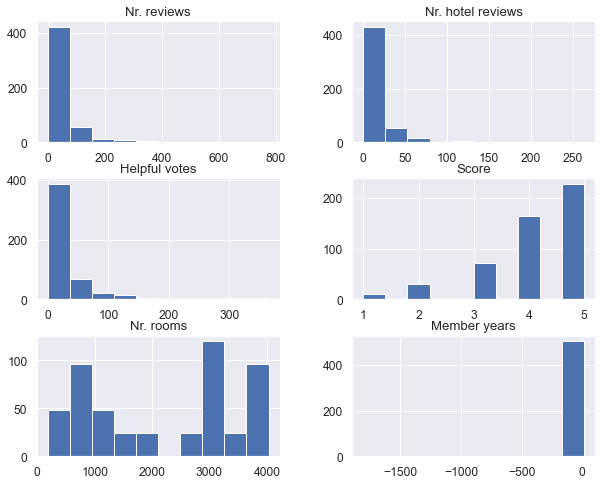

In [11]:
# histograms
lv.hist(figsize = (10, 8))
plt.show()

<AxesSubplot:>

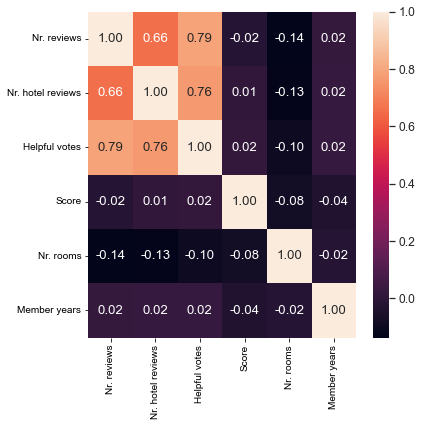

In [10]:
#heatmap
plt.subplots(figsize=(6,6))
sns.set(font_scale=1.1)
sns.heatmap(lv.corr(), annot=True, fmt='.2f')

In [8]:
lv

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,UK,15,4,8,5,Sep-Nov,Couples,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,4,826,Europe,1,October,Sunday
500,Canada,50,13,29,4,Sep-Nov,Couples,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,4,826,North America,8,November,Thursday
501,USA,154,23,31,4,Sep-Nov,Friends,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,4,826,North America,4,November,Thursday
502,USA,9,6,5,2,Dec-Feb,Families,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,4,826,North America,9,December,Wednesday


In [13]:
pd.factorize(lv['Traveler type'])[1]

Index(['Friends', 'Business', 'Families', 'Solo', 'Couples'], dtype='object')

In [16]:
lv.loc[:,'traveler'] = pd.factorize(lv['Traveler type'])[0]

In [17]:
pd.factorize(lv['Period of stay'])[1]

Index(['Dec-Feb', 'Mar-May', 'Jun-Aug', 'Sep-Nov'], dtype='object')

In [18]:
lv.loc[:,'season'] = pd.factorize(lv['Period of stay'])[0]

In [19]:
pd.factorize(lv['User continent'])[1]

Index(['North America', 'Europe', 'Asia', 'Oceania', 'Africa',
       'South America'],
      dtype='object')

In [20]:
lv.loc[:,'continent'] = pd.factorize(lv['User continent'])[0]

In [21]:
pd.factorize(lv['Hotel name'])[1]

Index(['Circus Circus Hotel & Casino Las Vegas', 'Excalibur Hotel & Casino',
       'Monte Carlo Resort&Casino', 'Treasure Island- TI Hotel & Casino',
       'Tropicana Las Vegas - A Double Tree by Hilton Hotel', 'Caesars Palace',
       'The Cosmopolitan Las Vegas', 'The Palazzo Resort Hotel Casino',
       'Wynn Las Vegas', 'Trump International Hotel Las Vegas', 'The Cromwell',
       'Encore at wynn Las Vegas', 'Hilton Grand Vacations on the Boulevard',
       'Marriott's Grand Chateau', 'Tuscany Las Vegas Suites & Casino',
       'Hilton Grand Vacations at the Flamingo', 'Wyndham Grand Desert',
       'The Venetian Las Vegas Hotel', 'Bellagio Las Vegas', 'Paris Las Vegas',
       'The Westin las Vegas Hotel Casino & Spa'],
      dtype='object')

In [22]:
lv.loc[:,'hotel'] = pd.factorize(lv['Hotel name'])[0]

In [24]:
pd.factorize(lv['Review month'])[1]

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object')

In [29]:
lv.loc[:,'month'] = pd.factorize(lv['Review month'])[0]

In [25]:
pd.factorize(lv['Review weekday'])[1]

Index(['Thursday', 'Friday', 'Saturday', 'Tuesday', 'Wednesday', 'Sunday',
       'Monday'],
      dtype='object')

In [26]:
lv['Review weekday'].map({'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7})

0      4
1      5
2      6
3      5
4      2
      ..
499    7
500    4
501    4
502    3
503    2
Name: Review weekday, Length: 504, dtype: int64

In [27]:
lv.loc[:,'weekday'] = lv['Review weekday'].map({'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4,
                                                'Friday':5, 'Saturday':6, 'Sunday':7})

In [40]:
lv.loc[:,'stars'] = lv['Hotel stars'].str.replace(',','.')
# convert str to float
lv = lv.astype({"stars":'float'})

In [42]:
lv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   User country       504 non-null    object 
 1   Nr. reviews        504 non-null    int64  
 2   Nr. hotel reviews  504 non-null    int64  
 3   Helpful votes      504 non-null    int64  
 4   Score              504 non-null    int64  
 5   Period of stay     504 non-null    object 
 6   Traveler type      504 non-null    object 
 7   Pool               504 non-null    object 
 8   Gym                504 non-null    object 
 9   Tennis court       504 non-null    object 
 10  Spa                504 non-null    object 
 11  Casino             504 non-null    object 
 12  Free internet      504 non-null    object 
 13  Hotel name         504 non-null    object 
 14  Hotel stars        504 non-null    object 
 15  Nr. rooms          504 non-null    int64  
 16  User continent     504 non

In [43]:
# separate independent variable - features - from target and split training and test datasets
X, y = lv.drop(['User country', 'Period of stay','Traveler type','Pool','Gym', \
               'Tennis court','Spa','Casino','Free internet','Hotel name','User continent', \
               'Review month', 'Review weekday', 'Hotel stars', 'Score'], axis = 1), lv.Score
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 93, stratify = y)

In [57]:
y.value_counts(normalize=True)

5    0.450397
4    0.325397
3    0.142857
2    0.059524
1    0.021825
Name: Score, dtype: float64

In [58]:
y_train.value_counts(normalize=True)

5    0.449735
4    0.325397
3    0.142857
2    0.060847
1    0.021164
Name: Score, dtype: float64

In [59]:
y_test.value_counts(normalize=True)

5    0.452381
4    0.325397
3    0.142857
2    0.055556
1    0.023810
Name: Score, dtype: float64

In [44]:
# since there is no aplhanumeric columns, we can just scale and classify data, no transformation needed
# n_neighbors=5 by default!
lv_pipeline = Pipeline([('scale', StandardScaler()),
                        ('knn', KNeighborsClassifier())])
lv_pipeline.fit(X_train, y_train)
lv_preds = lv_pipeline.predict(X_test)
lv_proba = lv_pipeline.predict_proba(X_test)

In [48]:
# adjust decision boundary
thresholds = np.arange(0, 1, .1)
# auc decision boundary
lv_db = pd.DataFrame(
    {'threshold':thresholds,
     'accuracy' :[accuracy_score(y_test, np.where(lv_proba[:, 1] >= t, 1, 0) ) for t in thresholds],
     'precision':[precision_score(y_test, np.where(lv_proba[:, 1] >= t, 1, 0),
                                  pos_label=1, zero_division=0, average='weighted') for t in thresholds],
     'recall'   :[recall_score(y_test, np.where(lv_proba[:, 1] >= t, 1, 0),
                               pos_label=1, zero_division=0, average='weighted') for t in thresholds]
    })

In [49]:
lv_db

,threshold,accuracy,precision,recall
0,0.0,0.023810,0.000567,0.023810
1,0.1,0.007937,0.000700,0.007937
2,0.2,0.007937,0.000700,0.007937
3,0.3,0.000000,0.000000,0.000000
4,0.4,0.000000,0.000000,0.000000
5,0.5,0.000000,0.000000,0.000000
6,0.6,0.000000,0.000000,0.000000
7,0.7,0.000000,0.000000,0.000000
8,0.8,0.000000,0.000000,0.000000
9,0.9,0.000000,0.000000,0.000000


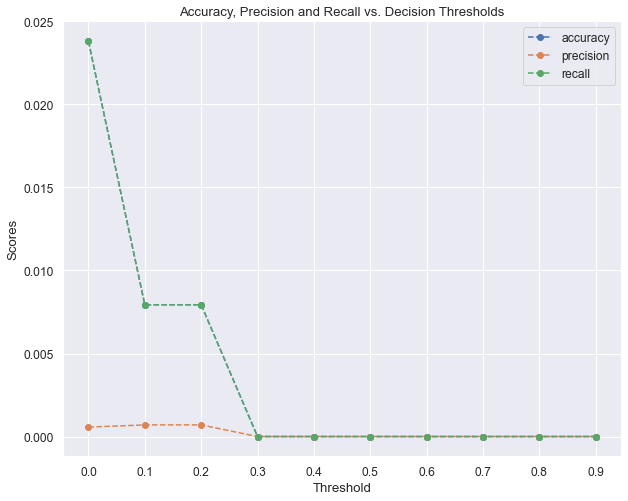

In [52]:
# plot 
plt.subplots(figsize=(10,8))
plt.plot(lv_db['threshold'], lv_db['accuracy'], '--o', label = 'accuracy')
plt.plot(lv_db['threshold'], lv_db['precision'], '--o', label = 'precision')
plt.plot(lv_db['threshold'], lv_db['recall'], '--o', label = 'recall')
#plt.axvline(x=0.45, color="black", label = 'intersection')
plt.xticks(thresholds)
plt.xlabel('Threshold')
plt.ylabel('Scores')
plt.title('Accuracy, Precision and Recall vs. Decision Thresholds')
plt.legend()
plt.grid(True)

[0.  0.2 0.4]


Text(0.5, 1.0, 'Precision vs Recall')

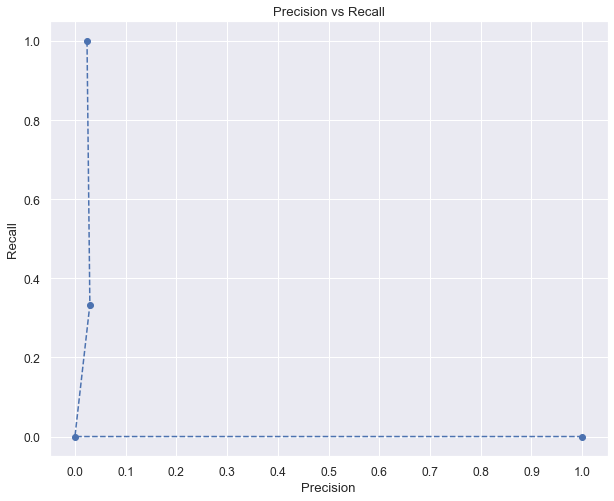

In [53]:
# Precision vs Recall
precision, recall, boundaries = precision_recall_curve(y_true = y_test,
                                                       probas_pred=lv_proba[:, 1], pos_label=1)
# 
print(boundaries[:5])
plt.subplots(figsize=(10,8))
plt.plot(precision, recall, '--o')
plt.xticks(np.arange(0, 1.1, .1))
plt.grid(True)
plt.ylabel('Recall')
plt.xlabel('Precision')
plt.title('Precision vs Recall')

In [56]:
y_test.value_counts()

5    57
4    41
3    18
2     7
1     3
Name: Score, dtype: int64

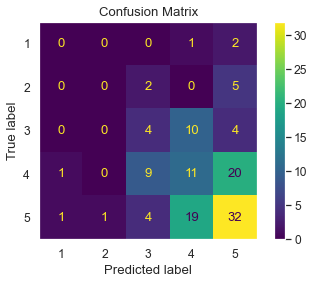

In [54]:
# blood_confusion_mat = confusion_matrix(y_test, blood_preds, labels=blood_pipeline.classes_)
# cplot = ConfusionMatrixDisplay(confusion_matrix=blood_confusion_mat, display_labels = ['No', 'Yes'])
# cplot.plot()
# plt.show()
ConfusionMatrixDisplay.from_predictions(y_test, lv_preds)
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()